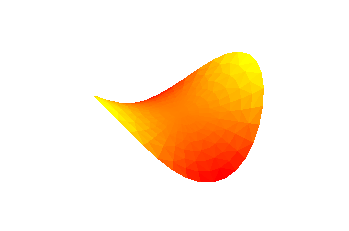

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import Rbf

n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

rbf = Rbf(x, y, z, epsilon=2)
z = rbf(x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.001, antialiased=False, cmap='autumn')

ax._axis3don = False
ax.view_init(60, 15)
plt.savefig('paraboloid.svg')
plt.show()